getting a feel for numpy polynomial curve fitting weights

*christian sutton*

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [3]:
x = np.array([i for i in range(100)])

In [4]:
y1 = 1*x + 30*np.random.random(size=100)+100
y2 = 2*x + 30*np.random.random(size=100) - 100
y3 = 3*x + 30*np.random.random(size=100)

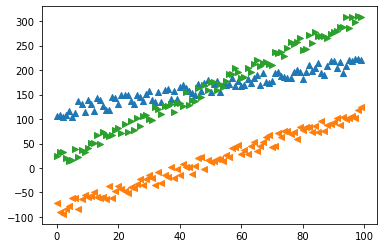

In [5]:
plt.scatter(x,y1,marker='^')
plt.scatter(x,y2,marker='<')
plt.scatter(x,y3,marker='>')

In [6]:
n1 = np.array([x,y1,np.ones_like(x)]).T
n2 = np.array([x,y2,2*np.ones_like(x)]).T
n3 = np.array([x,y3,3*np.ones_like(x)]).T

In [7]:
df1 = pd.DataFrame(n1,columns=['X','Y','G'])
df2 = pd.DataFrame(n2,columns=['X','Y','G'])
df3 = pd.DataFrame(n3,columns=['X','Y','G'])

In [8]:
df = (df1.append(df2)).append(df3)
df.reset_index(drop=True,inplace=True)

In [9]:
df

,X,Y,G
0,0.0,107.117321,1.0
1,1.0,107.737125,1.0
2,2.0,104.661922,1.0
3,3.0,108.142364,1.0
4,4.0,117.360712,1.0
...,...,...,...
295,95.0,285.264681,3.0
296,96.0,307.316402,3.0
297,97.0,297.807287,3.0
298,98.0,309.802684,3.0


In [10]:
order = 3

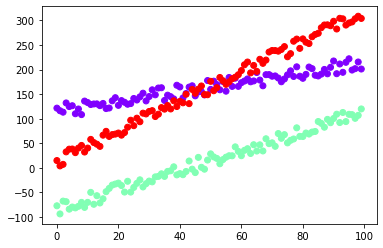

In [35]:
plt.scatter(df.X,df.Y,c=df.G,cmap='rainbow')

In [36]:
df['W'] = np.zeros_like(df.X)+10**-31
df.head(3)

,X,Y,G,W
0,0.0,121.535049,1.0,1.000000e-31
1,1.0,116.235924,1.0,1.000000e-31
2,2.0,113.315394,1.0,1.000000e-31


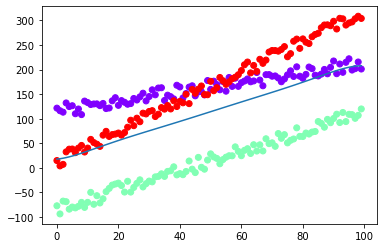

In [37]:
f = np.polynomial.Polynomial.fit(df.X,df.Y,deg=order,w=df.W)
g = f.convert()
plt.plot(df.X[df.G == 1],g(df.X[df.G == 1]))
plt.scatter(df.X,df.Y,c=df.G,cmap='rainbow')

#### *note*: above plot, all weights are set to `10^-31` and all equivalent

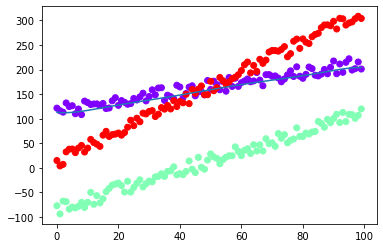

In [38]:
df.W = 5**-df.G
f = np.polynomial.Polynomial.fit(df.X,df.Y,deg=order,w=df.W)
g = f.convert()
plt.plot(df.X[df.G == 1],g(df.X[df.G == 1]))
plt.scatter(df.X,df.Y,c=df.G,cmap='rainbow')

#### *note*: line with slope = 1 has weight of `0.2`, and other weights are smaller.  This has the strongest impact and you can see the line is fit to those points.

In [39]:
df.loc[0],df.loc[100],df.loc[200]

(X      0.000000
 Y    121.535049
 G      1.000000
 W      0.200000
 Name: 0, dtype: float64,
 X     0.000000
 Y   -77.202471
 G     2.000000
 W     0.040000
 Name: 100, dtype: float64,
 X     0.000000
 Y    14.862152
 G     3.000000
 W     0.008000
 Name: 200, dtype: float64)

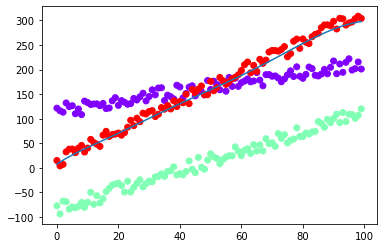

In [40]:
df.W = 5**(df.G-4)
f = np.polynomial.Polynomial.fit(df.X,df.Y,deg=order,w=df.W)
g = f.convert()
plt.plot(df.X[df.G == 1],g(df.X[df.G == 1]))
plt.scatter(df.X,df.Y,c=df.G,cmap='rainbow')

#### *note*: line with slope = 3 has weight of `0.2`, and other weights are smaller.  This has the strongest impact and you can see the line is fit to those points.

In [41]:
df.loc[0],df.loc[100],df.loc[200]

(X      0.000000
 Y    121.535049
 G      1.000000
 W      0.008000
 Name: 0, dtype: float64,
 X     0.000000
 Y   -77.202471
 G     2.000000
 W     0.040000
 Name: 100, dtype: float64,
 X     0.000000
 Y    14.862152
 G     3.000000
 W     0.200000
 Name: 200, dtype: float64)

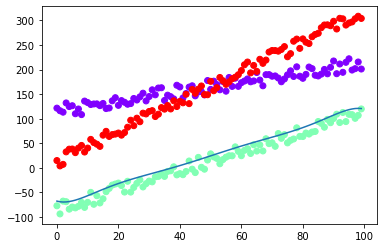

In [42]:
df.W = 2*(5**(-abs(df.G-2)))/10
f = np.polynomial.Polynomial.fit(df.X,df.Y,deg=order,w=df.W)
g = f.convert()
plt.plot(df.X[df.G == 1],g(df.X[df.G == 1]))
plt.scatter(df.X,df.Y,c=df.G,cmap='rainbow')

#### *note*: line with slope = 2 has weight of `0.2`, and other weights are smaller.  This has the strongest impact and you can see the line is fit to those points.

In [43]:
df.loc[0],df.loc[100],df.loc[200]

(X      0.000000
 Y    121.535049
 G      1.000000
 W      0.040000
 Name: 0, dtype: float64,
 X     0.000000
 Y   -77.202471
 G     2.000000
 W     0.200000
 Name: 100, dtype: float64,
 X     0.000000
 Y    14.862152
 G     3.000000
 W     0.040000
 Name: 200, dtype: float64)

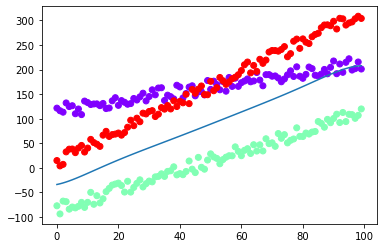

In [44]:
df.W = 0.2 * (df.G > 1)
f = np.polynomial.Polynomial.fit(df.X,df.Y,deg=order,w=df.W)
g = f.convert()
plt.plot(df.X[df.G == 1],g(df.X[df.G == 1]))
plt.scatter(df.X,df.Y,c=df.G,cmap='rainbow')

#### de-emphasize purple, red and aqua have same weight (0.2)

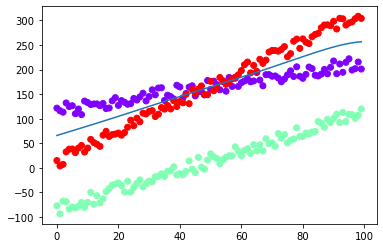

In [45]:
df.W = 0.2 * (df.G != 2)
f = np.polynomial.Polynomial.fit(df.X,df.Y,deg=order,w=df.W)
g = f.convert()
plt.plot(df.X[df.G == 1],g(df.X[df.G == 1]))
plt.scatter(df.X,df.Y,c=df.G,cmap='rainbow')

#### de-emphasize aqua, red and purple have same weight (0.2)

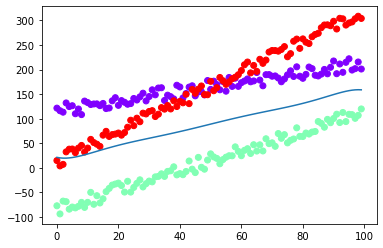

In [46]:
df.W = 0.2 * (df.G != 3)
f = np.polynomial.Polynomial.fit(df.X,df.Y,deg=order,w=df.W)
g = f.convert()
plt.plot(df.X[df.G == 1],g(df.X[df.G == 1]))
plt.scatter(df.X,df.Y,c=df.G,cmap='rainbow')

#### de-emphasize red, purple and aqua have same weight (0.2)

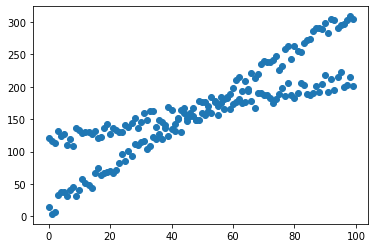

In [47]:
plt.scatter(df.X[(df.G == 1) | (df.G ==3)],df.Y[(df.G == 1) | (df.G ==3)])

In [48]:
df.W[(df.G == 1) & (df.X  < 50)] = .2
df.W[(df.G == 1) & (df.X >= 50)] = 1e-31
df.W[(df.G == 3) & (df.X  < 50)] = 1e-31
df.W[(df.G == 3) & (df.X >= 50)] = 0.2
df.W[(df.G == 2)] = 1e-31


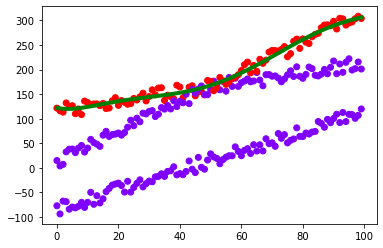

In [49]:
f = np.polynomial.Polynomial.fit(df.X,df.Y,deg=order,w=df.W)
g = f.convert()
plt.plot(df.X[df.G == 1],g(df.X[df.G == 1]),lw=4,c='g')
plt.scatter(df.X,df.Y,c=df.W,cmap='rainbow')

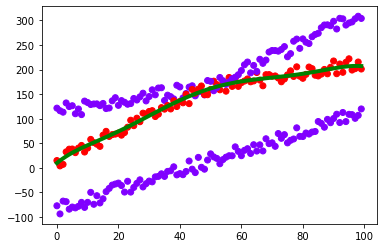

In [51]:
df.W[(df.G == 1) & (df.X  < 50)] = 1e-31
df.W[(df.G == 1) & (df.X >= 50)] = .2
df.W[(df.G == 3) & (df.X  < 50)] = .2
df.W[(df.G == 3) & (df.X >= 50)] = 1e-31
df.W[(df.G == 2)] = 1e-31

f = np.polynomial.Polynomial.fit(df.X,df.Y,deg=order,w=df.W)
g = f.convert()
plt.plot(df.X[df.G == 1],g(df.X[df.G == 1]),lw=4,c='g')
plt.scatter(df.X,df.Y,c=df.W,cmap='rainbow')